Run the cell below:

In [1]:
import pandas as pd
import statsmodels.api as sm
import pandas_datareader as pdr

From the St. Louis FRED, download data on monthly US industrial production ('IPROD') and US policy uncertainty ('USEPUINDXM') from 1985 to 2020 (inclusive). 

In [2]:
df = pdr.DataReader(name=['INDPRO','USEPUINDXM'], data_source='fred',
                   start = '1985-01-01', end = '2020-12-31')
df

,INDPRO,USEPUINDXM
DATE,,
1985-01-01,54.7203,125.22474
1985-02-01,54.9100,99.02081
1985-03-01,54.9841,112.19051
1985-04-01,54.8853,102.81133
1985-05-01,54.9520,120.08273
...,...,...
2020-08-01,95.8924,224.42636
2020-09-01,95.6019,218.05827
2020-10-01,96.6454,249.17361


Plot both series, in separate subplots of the same graph.

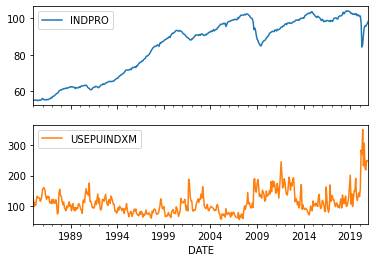

In [3]:
df.plot(subplots = True);

Create a new variable called ``future_ipro``, which gives us the industrial production from 6 months into the future.

In [4]:
df['future_ipro'] = df['INDPRO'].shift(-6)
df.head(7)

,INDPRO,USEPUINDXM,future_ipro
DATE,,,
1985-01-01,54.7203,125.22474,54.6420
1985-02-01,54.9100,99.02081,54.8269
1985-03-01,54.9841,112.19051,55.0447
1985-04-01,54.8853,102.81133,54.8418
1985-05-01,54.9520,120.08273,55.0381
1985-06-01,54.9269,132.71318,55.5958
1985-07-01,54.6420,128.00182,55.8793


Create a column of 1's and call it ``const``.

In [5]:
df['const'] = 1
df.head(2)

,INDPRO,USEPUINDXM,future_ipro,const
DATE,,,,
1985-01-01,54.7203,125.22474,54.6420,1
1985-02-01,54.9100,99.02081,54.8269,1


Regress future industrial production (``future_ipro``) on current policy uncertainty (``USEPUINDXM``) and the constant.

In [6]:
res = sm.OLS(endog = df['future_ipro'],
            exog = df[['const','USEPUINDXM']],
            missing = 'drop').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            future_ipro   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6099
Date:                Wed, 02 Mar 2022   Prob (F-statistic):              0.435
Time:                        14:30:22   Log-Likelihood:                -1779.2
No. Observations:                 426   AIC:                             3562.
Df Residuals:                     424   BIC:                             3570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.1545      2.475     33.600      0.0

Print out just the regression coefficients from the regression output above.

In [7]:
res.params

const         83.154542
USEPUINDXM     0.016559
dtype: float64

Print out just the t-statistics from the regression output above.

In [8]:
res.tvalues

const         33.600423
USEPUINDXM     0.780943
dtype: float64

Print out just the p-values from the regression output above.

In [9]:
res.pvalues

const         1.351321e-121
USEPUINDXM     4.352720e-01
dtype: float64

Based on your regression results, is policy uncertainty a statistically significant predictor of future industrial production at the 95\% confidence level? Why?

A: it is not, because the p-value of the policy uncertainty variable is not lower than 5\%: 

In [10]:
res.pvalues['USEPUINDXM']

0.43527198325229155

Given your regression results, what percentage of the total variance of industrial production can be explained by the variance in policy uncertainty?

A: This is given by the R-squared coefficient:

In [11]:
res.rsquared

0.0014363102707130038